In [1]:
import torch.optim as optim
import torch.cuda as cuda
import torch.nn.functional as F
import torch
import matplotlib.pyplot as plt
import cv2
from torch import cat
from UNET import UNET
from torch.utils.data import random_split
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from Dataset import FramesDataset

In [2]:
BATCH = 2
EPOCHS = 3
LR = 0.0001
cuda.empty_cache()
device = "cuda" if cuda.is_available() else "cpu"
dataset = FramesDataset(dir = r'C:\Users\Mau\Desktop\proyectos\Proyecto\test_2k_540p', transform=transforms.ToTensor())
unet = UNET(in_channels=6, out_channels=3).to(device)
optimizer = optim.Adam(unet.parameters(), lr= LR)

In [3]:
len = dataset.__len__()
test = len//10
train = len - test 
trainset, testset = random_split(dataset,[train,test])
trainset = DataLoader(trainset, batch_size=BATCH, shuffle=True)
testset = DataLoader(testset, batch_size=BATCH, shuffle=False)

In [4]:
loss = None
for epoch in range(EPOCHS):
    for data in trainset:
        cuda.empty_cache()
        (F1,F3) ,F2 = data
        F2 = F2.to(device)
        F1 = F1.to(device)
        F3 = F3.to(device)
        output = unet(F1, F3)
        optimizer.zero_grad()
        loss  = F.mse_loss(output , F2)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0126, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0143, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0189, device='cuda:0', grad_fn=<MseLossBackward0>)


In [5]:
loss = None
optimizer = optim.Adam(unet.parameters(), lr= LR/10)
for epoch in range(EPOCHS):
    for data in trainset:
        cuda.empty_cache()
        (F1,F3) ,F2 = data
        F2 = F2.to(device)
        F1 = F1.to(device)
        F3 = F3.to(device)
        output = unet(F1, F3)
        optimizer.zero_grad()
        loss  = F.mse_loss(output , F2)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0081, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0030, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0079, device='cuda:0', grad_fn=<MseLossBackward0>)


In [6]:
loss = None
optimizer = optim.Adam(unet.parameters(), lr= LR/10)
for epoch in range(EPOCHS):
    for data in trainset:
        cuda.empty_cache()
        (F1,F3) ,F2 = data
        F2 = F2.to(device)
        F1 = F1.to(device)
        F3 = F3.to(device)
        output = unet(F1, F3)
        optimizer.zero_grad()
        loss  = F.mse_loss(output , F2)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0031, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0047, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0086, device='cuda:0', grad_fn=<MseLossBackward0>)


In [7]:
data = 0
data = next(iter(trainset))
(F1,F3) ,F2 = data
unet = unet.cpu()
output = unet(F1, F3)

In [8]:
img1 = F1.cpu().numpy()[0].transpose(1,2,0)
img2 = F2.cpu().numpy()[0].transpose(1,2,0)
img3 = F3.cpu().numpy()[0].transpose(1,2,0)
generated = output.cpu().detach().numpy()[0].transpose(1,2,0)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
generated = cv2.cvtColor(generated, cv2.COLOR_BGR2RGB)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'generated')

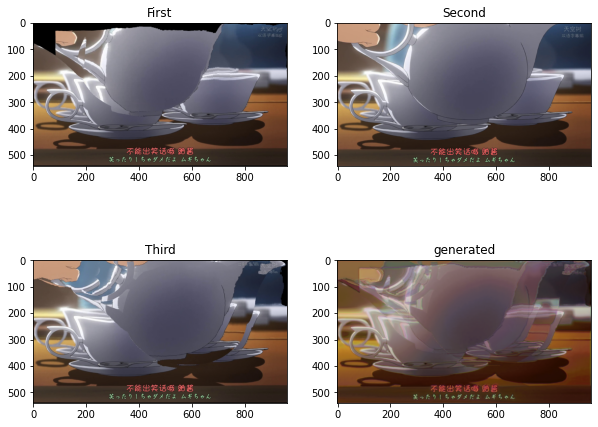

In [9]:
fig = plt.figure(figsize=(10, 8))

fig.add_subplot(2, 2, 1) 
plt.imshow(img1)
plt.title("First")
  
fig.add_subplot(2, 2, 2)
plt.imshow(img2)
plt.title("Second")
  
fig.add_subplot(2, 2, 3)
plt.imshow(img3)
plt.title("Third")

fig.add_subplot(2, 2, 4)
plt.imshow(generated)
plt.title("generated")

In [10]:
torch.save(unet.state_dict(), 'weights.pth')